In [51]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn import neighbors

In [2]:
df=pd.read_csv("DS3_C6_S3_MallCustomers_Data_Project.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.shape

(200, 5)

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
#no null values are present

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# VISULIZATION

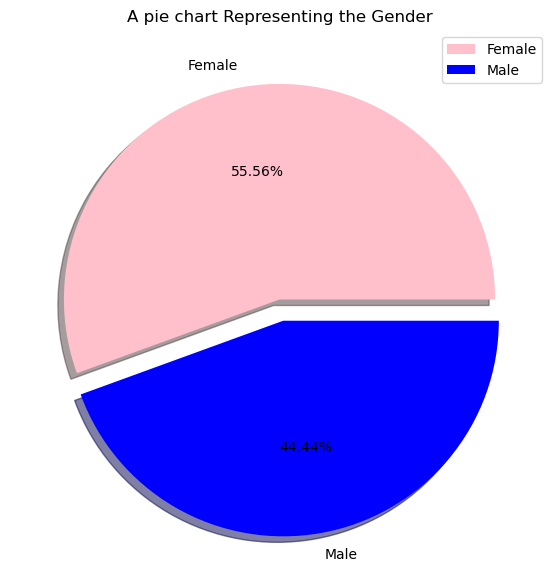

In [12]:
labels = ['Female', 'Male']
size = [100, 80]
colors = ['pink', 'blue']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('A pie chart Representing the Gender')
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
#interpertations: 56 % are female and 44 are male of total population

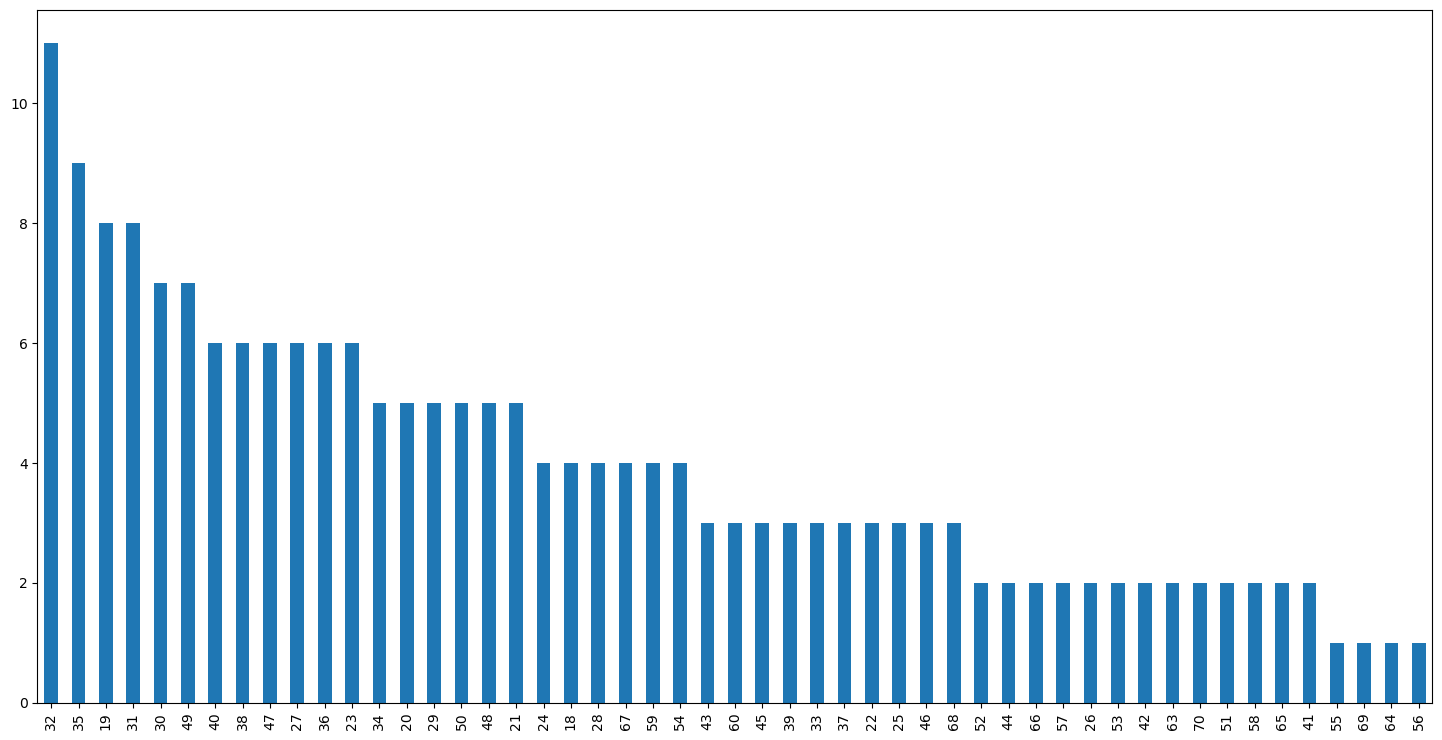

In [13]:
df['Age'].value_counts().plot.bar(figsize = (18, 9))
plt.show()

In [ ]:
# Max number of pepole belongs to age of 32 and ninimum of 55 age

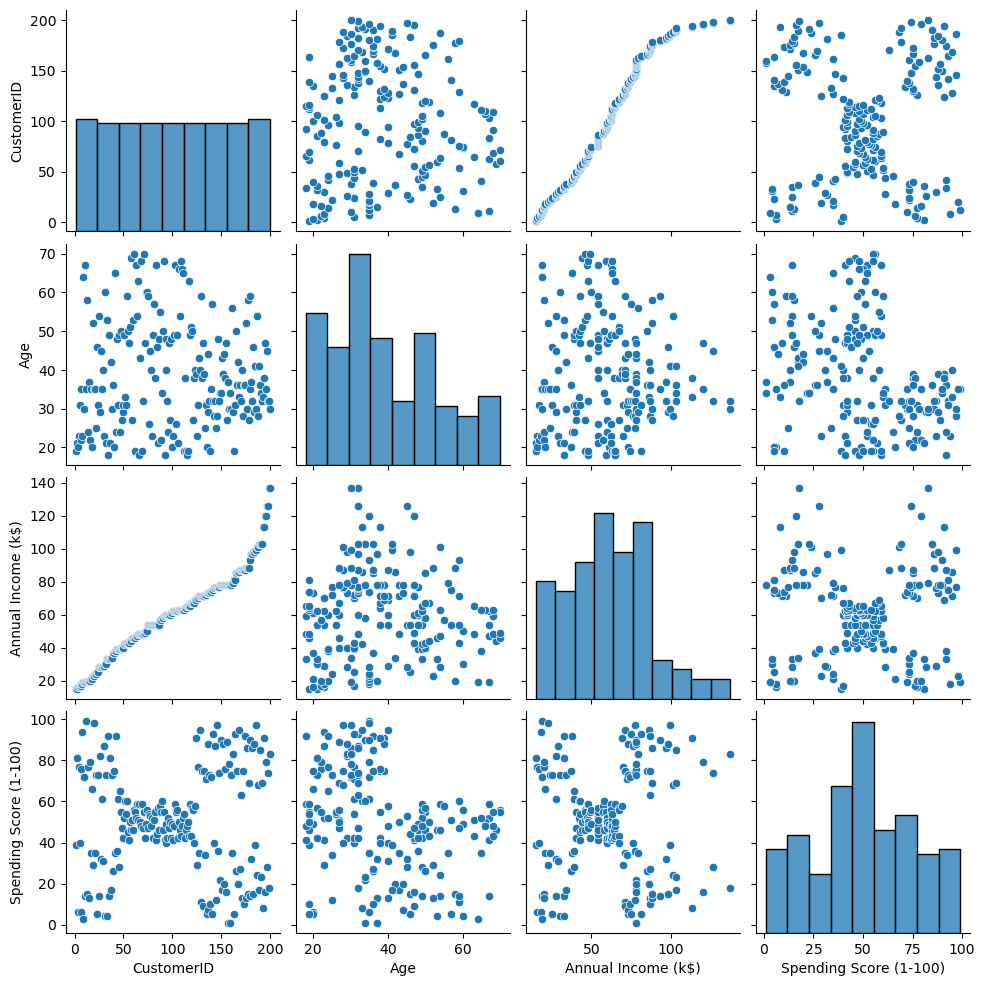

In [14]:
sns.pairplot(df)

In [15]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Gender']= le.fit_transform(df['Gender'])

In [17]:
df_new= df.drop(columns= 'CustomerID')

# Data labelling

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
m= MinMaxScaler()
df_scaled= m.fit_transform(df_new)
df_scaled

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918],
       [0.        , 0.07692308, 0.01639344, 0.76530612],
       [0.        , 0.32692308, 0.02459016, 0.05102041],
       [0.        , 0.09615385, 0.02459016, 0.94897959],
       [1.        , 0.88461538, 0.03278689, 0.02040816],
       [0.        , 0.23076923, 0.03278689, 0.7244898 ],
       [1.        , 0.94230769, 0.03278689, 0.13265306],
       [0.        , 0.32692308, 0.03278689, 1.        ],
       [0.        , 0.76923077, 0.04098361, 0.14285714],
       [0.        , 0.11538462, 0.04098361, 0.7755102 ],
       [1.        , 0.36538462, 0.04098361, 0.12244898],
       [1.        , 0.07692308, 0.04098361, 0.79591837],
       [0.        , 0.32692308, 0.04918033, 0.34693878],
       [1.        , 0.03846154,

In [20]:
df1=pd.DataFrame(df_scaled, columns=['Gender','Age','Annual_Income','Spending_Score'])

In [21]:
columns_correlation= df1.corr()
columns_correlation

,Gender,Age,Annual_Income,Spending_Score
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual_Income,0.056410,-0.012398,1.000000,0.009903
Spending_Score,-0.058109,-0.327227,0.009903,1.000000


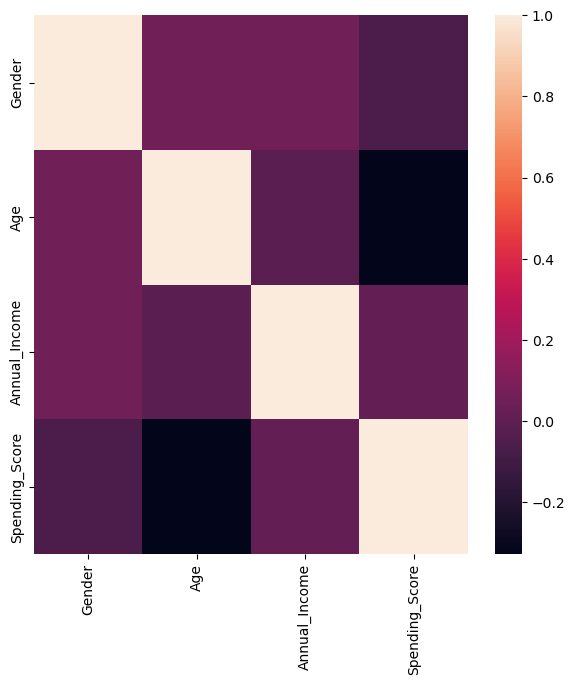

In [22]:
sns.heatmap(columns_correlation)
plt.show()

# Feature Selection

In [ ]:
#Comments:As per corr matrix the spending_score,Anual income have high correlation value 

In [23]:
X= df1.iloc[:, [2,3]].values
X

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

# Model Building 

# Hirerichal Clustering

In [24]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [25]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Plotting Dendogram

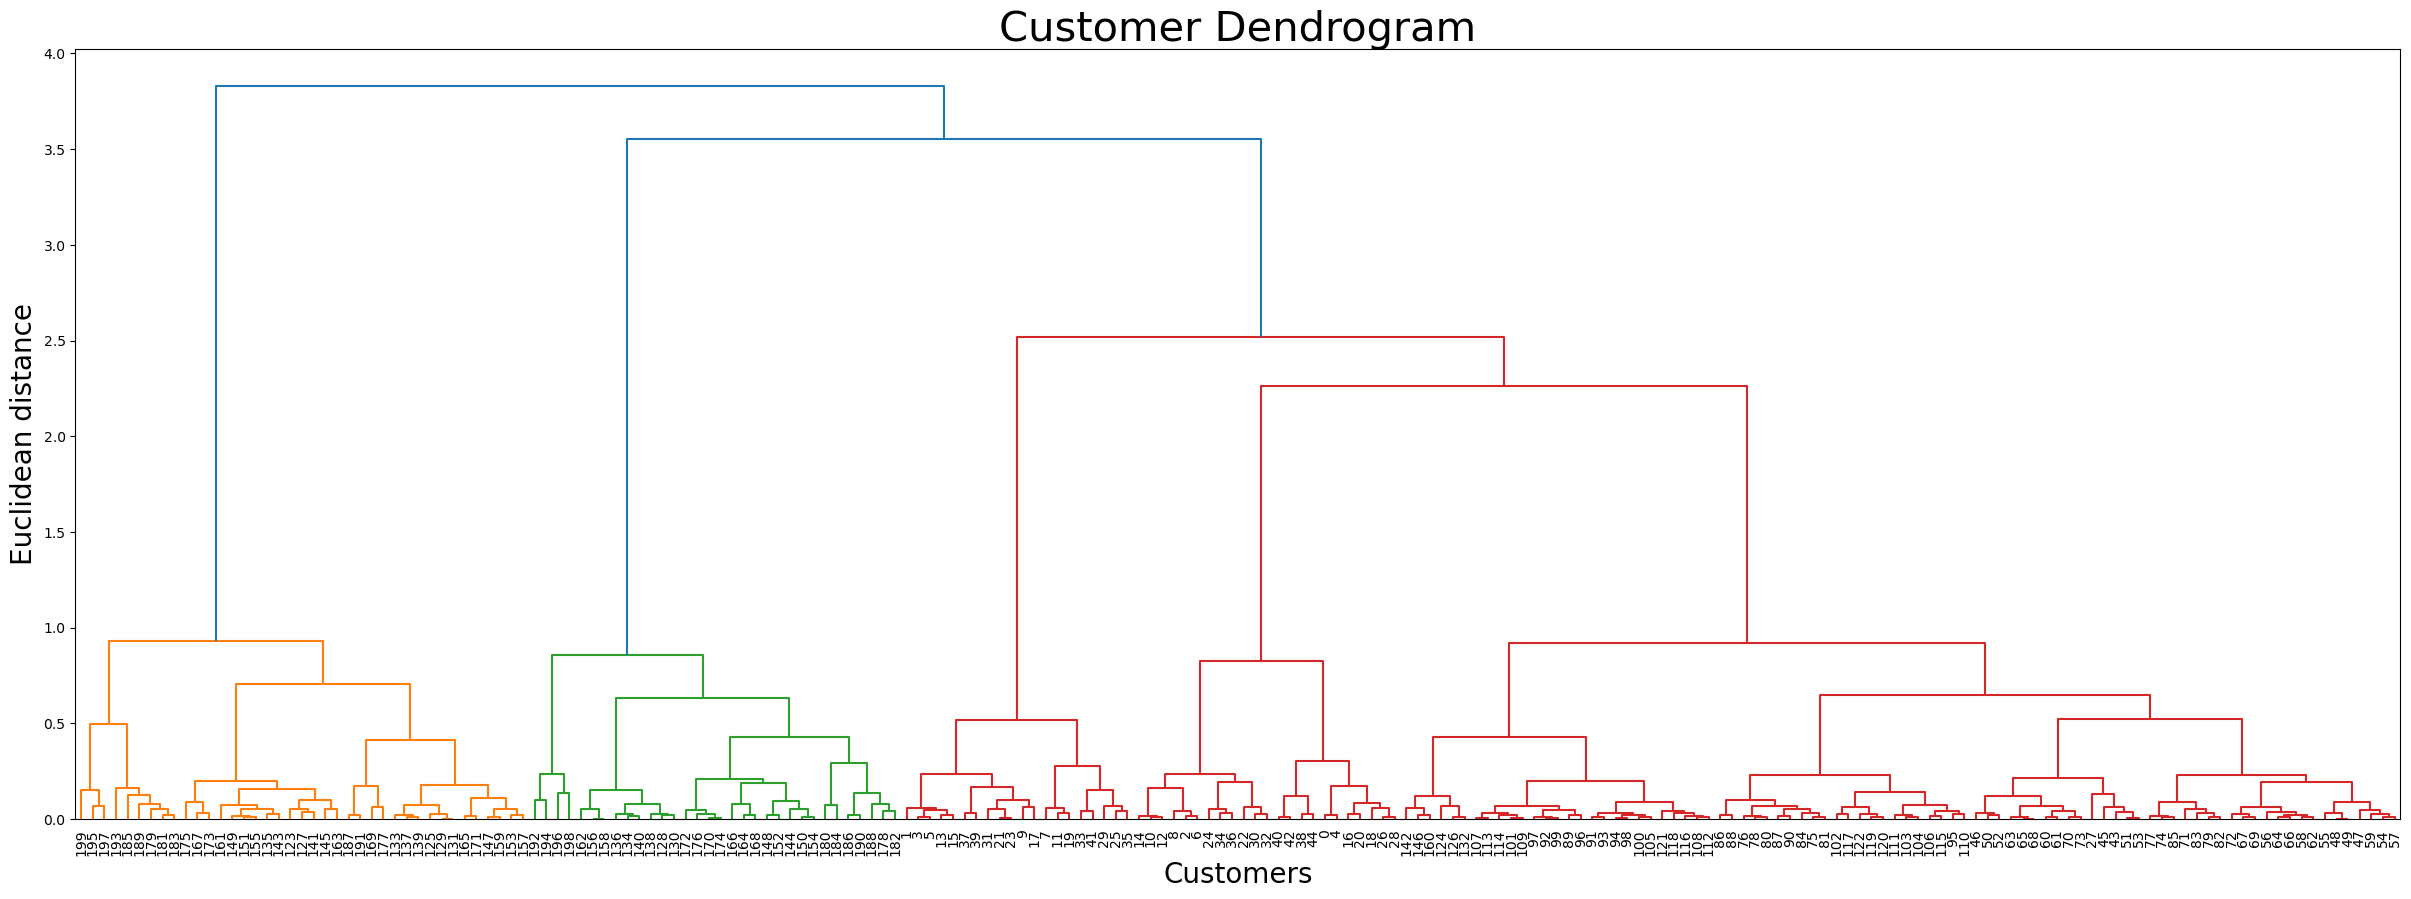

In [26]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=df_new.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10) 
plt.title('Customer Dendrogram',fontsize=30) 
plt.xlabel('Customers',fontsize=20) 
plt.ylabel('Euclidean distance', fontsize=20) 
plt.show()

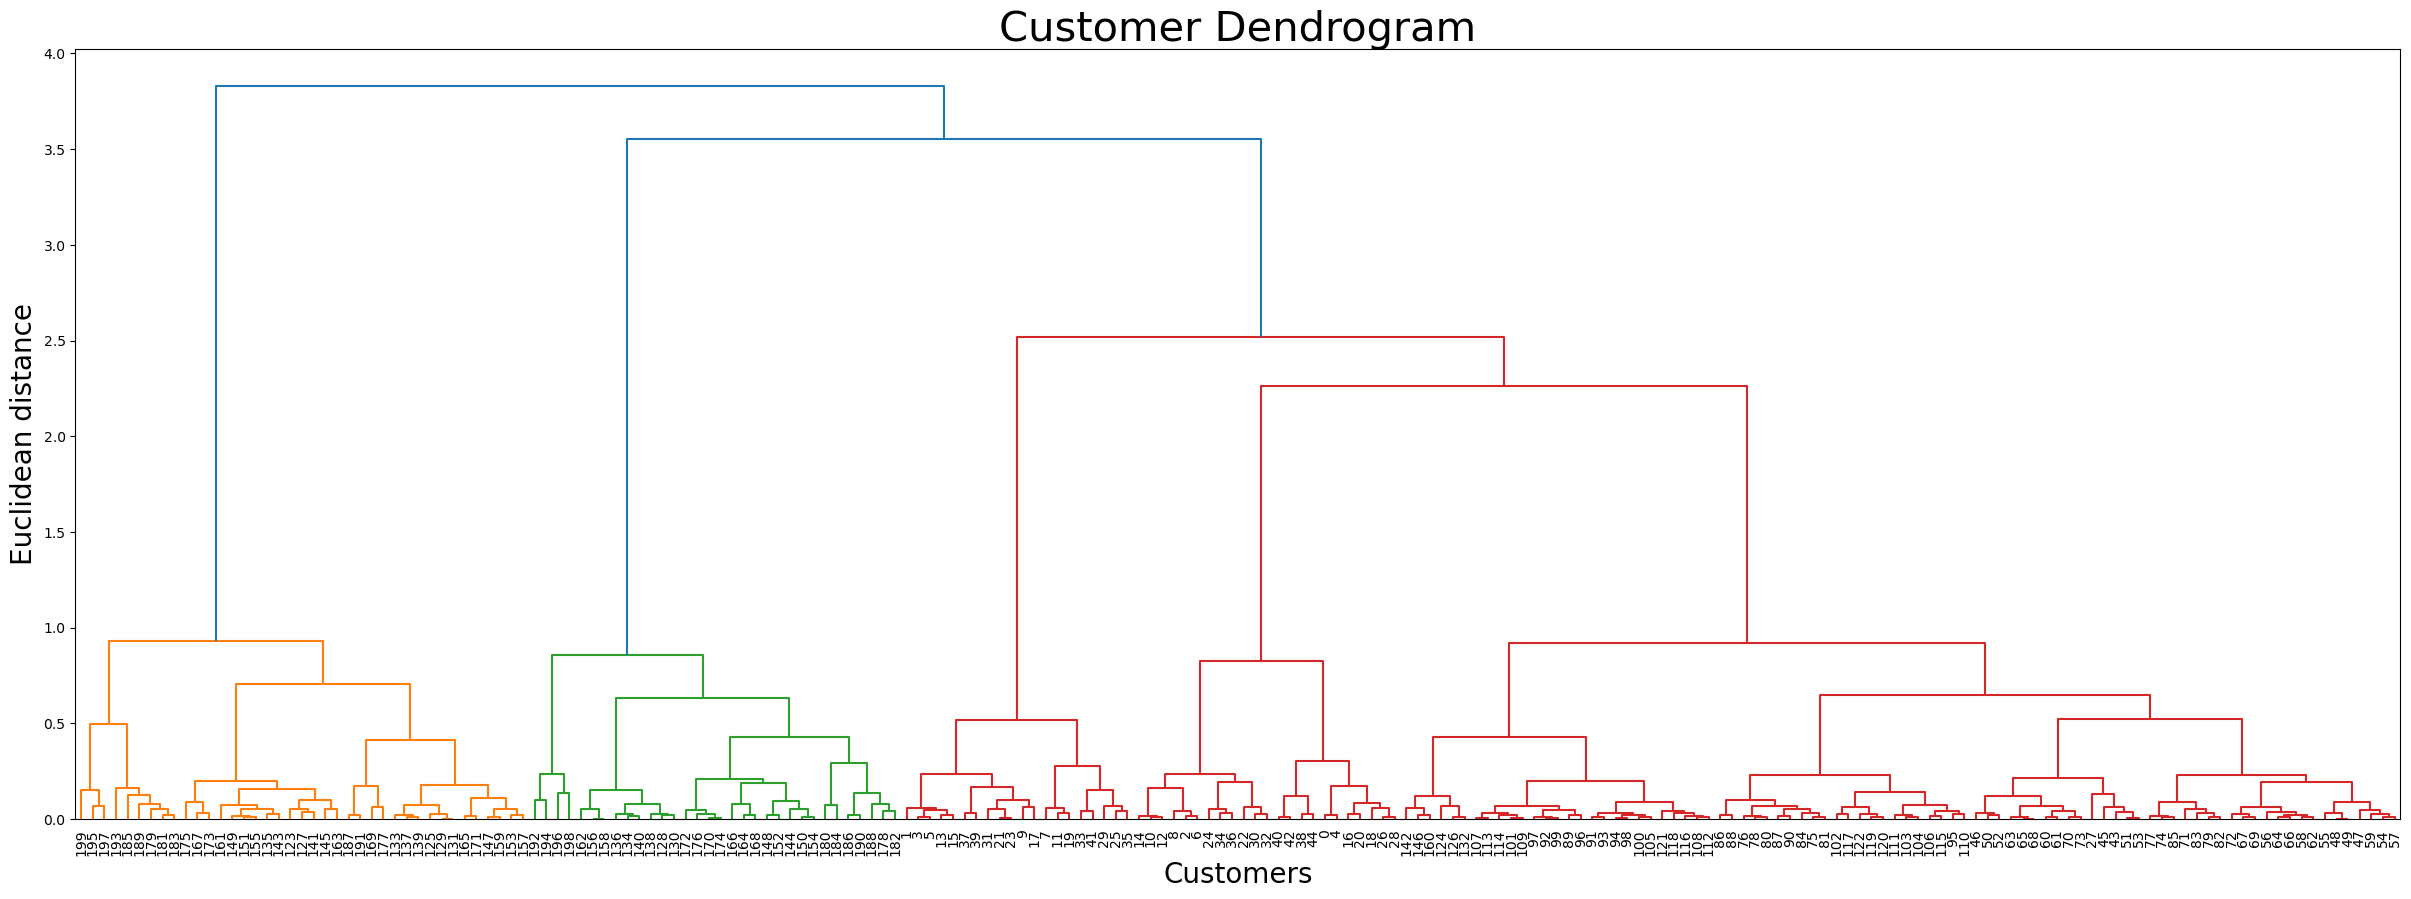

In [28]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=df_new.index)
plt.axhline(y=150, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10) 
plt.title('Customer Dendrogram',fontsize=30) 
plt.xlabel('Customers',fontsize=20) 
plt.ylabel('Euclidean distance', fontsize=20) 
plt.show()

#visuliasation of cluster

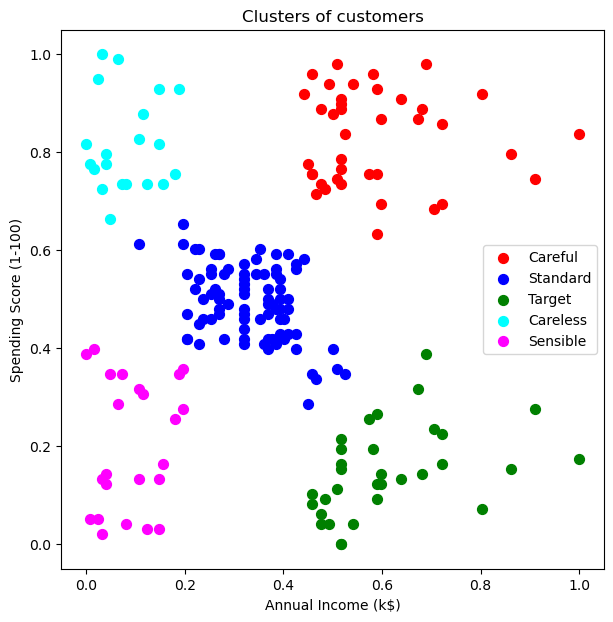

In [29]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful') 
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target') 
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless') 
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible') 
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
#As per above scatter plot the stanard customer is more coagulated 0.2-0.4 $

# DBSCAN

In [30]:
df = pd.DataFrame({'Annual Income':X[:,0],'Spending score':X[:,1]})
df

,Annual Income,Spending score
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959
...,...,...
195,0.860656,0.795918
196,0.909836,0.275510
197,0.909836,0.744898
198,1.000000,0.173469


In [31]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

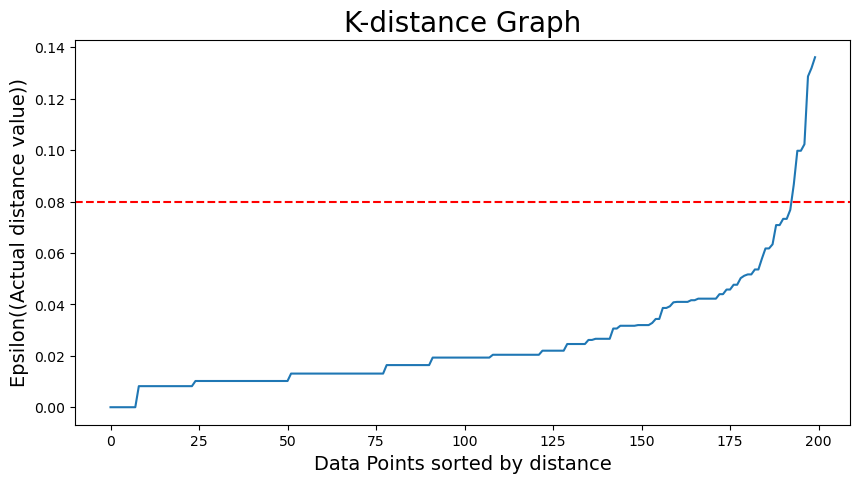

In [32]:
# k-Distance graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.axhline(y=0.08, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon((Actual distance value))',fontsize=14)
plt.show()

In [33]:
from sklearn.cluster import DBSCAN

In [34]:
# dbscan assigning seperate labels for outlier which is -1

eps_optimum=0.08
for min_samples_list in [2,4,6,8,10,12]:
    clusterer = DBSCAN(eps=eps_optimum, min_samples=min_samples_list)
    cluster_labels = clusterer.fit_predict(df)
    # print(clusterer_labels)
    x= cluster_labels +2    # adding +2 to get exact count
    y = np.bincount(x)
    print(y)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps_optimum,'| min_samples= ', min_samples_list, '|No of clusters obtained clustering: ', results)

[ 0  7  7 18 12  3 89 32 26  2  2  2]
eps= 0.08 | min_samples=  2 |No of clusters obtained clustering:  [(1, 7), (2, 7), (3, 18), (4, 12), (5, 3), (6, 89), (7, 32), (8, 26), (9, 2), (10, 2), (11, 2)]
[ 0 18 17 12  7 88 32 23  3]
eps= 0.08 | min_samples=  4 |No of clusters obtained clustering:  [(1, 18), (2, 17), (3, 12), (4, 7), (5, 88), (6, 32), (7, 23), (8, 3)]
[ 0 28 12  8  7  4 88 30 23]
eps= 0.08 | min_samples=  6 |No of clusters obtained clustering:  [(1, 28), (2, 12), (3, 8), (4, 7), (5, 4), (6, 88), (7, 30), (8, 23)]
[ 0 57 12 84 26 21]
eps= 0.08 | min_samples=  8 |No of clusters obtained clustering:  [(1, 57), (2, 12), (3, 84), (4, 26), (5, 21)]
[ 0 72 84 13 12 11  8]
eps= 0.08 | min_samples=  10 |No of clusters obtained clustering:  [(1, 72), (2, 84), (3, 13), (4, 12), (5, 11), (6, 8)]
[ 0 94 82 12 12]
eps= 0.08 | min_samples=  12 |No of clusters obtained clustering:  [(1, 94), (2, 82), (3, 12), (4, 12)]


In [35]:
dbscan_opt = DBSCAN(eps=0.08,min_samples =10)
dbscan_opt.fit(df)

DBSCAN(eps=0.08, min_samples=10)

In [36]:
df["DBSCAN_opt_labels"]= dbscan_opt.labels_
df["DBSCAN_opt_labels"].value_counts()

 0    84
-1    72
 1    13
 2    12
 3    11
 4     8
Name: DBSCAN_opt_labels, dtype: int64

In [71]:
from sklearn import metrics 
import  matplotlib
colors = [ "purple","red","yellow","green",'cyan']

Silhouette coefficient :0.744


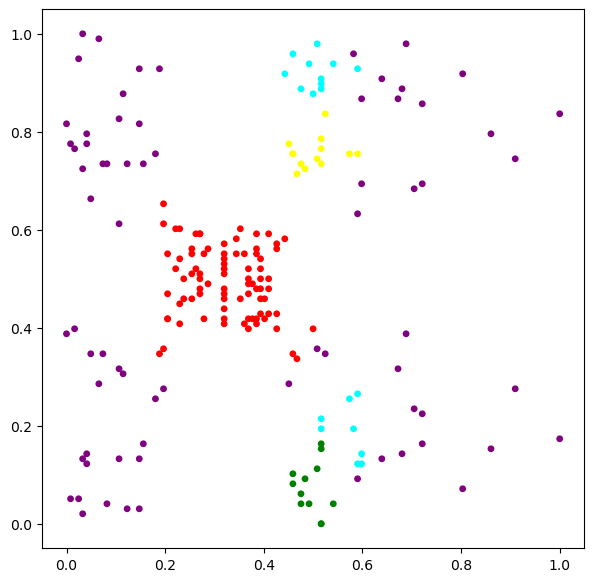

In [68]:
import matplotlib
plt.scatter(df['Annual Income'],df['Spending score'],c=df["DBSCAN_opt_labels"],
cmap =matplotlib.colors.ListedColormap(colors),s= 15)
print('Silhouette coefficient :%.3f'%metrics.silhouette_score(df,df["DBSCAN_opt_labels"]))

In [ ]:
#Silhoutee coefficient is 0.74

# K MEANS CLUSTERING

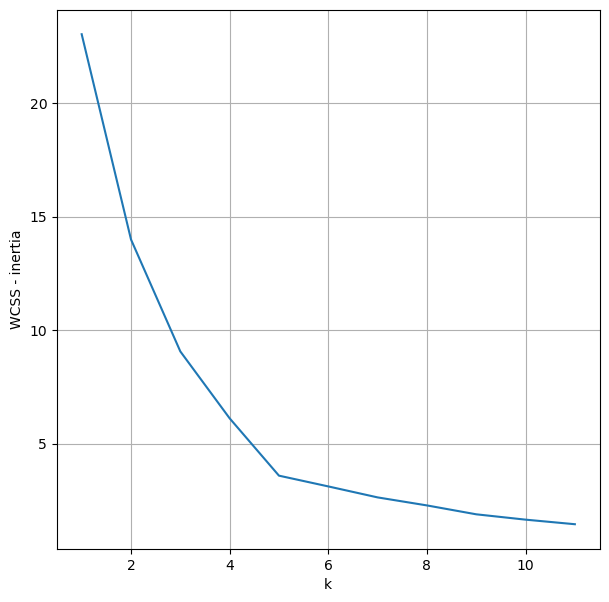

In [72]:
from sklearn.cluster import KMeans
WCSS = []

for k in range(1,12):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    WCSS.append(kmeans_model.inertia_)
    
plt.plot(range(1,12),WCSS)
plt.grid(True)
plt.xlabel('k')
plt.ylabel('WCSS - inertia')
plt.show()

#as elbow method k=5 so the group is classified into 5 groups
#In this problem, we are using the inertia as cost function in order to identify the sum of squared distances of samples to the nearest cluster centre.

In [73]:
kmeans_5 = KMeans(n_clusters=5)  
y_pred= kmeans_5.fit_predict(X)

In [74]:
cluster_centroid_5 =kmeans_5.cluster_centers_
cluster_centroid_5

array([[0.6       , 0.16443149],
       [0.32866853, 0.49340468],
       [0.58638083, 0.82783883],
       [0.08792846, 0.79962894],
       [0.08792846, 0.19619666]])

In [75]:
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [76]:
cluster_centroid_5 =kmeans_5.cluster_centers_
cluster_centroid_5

array([[0.6       , 0.16443149],
       [0.32866853, 0.49340468],
       [0.58638083, 0.82783883],
       [0.08792846, 0.79962894],
       [0.08792846, 0.19619666]])

In [77]:
k_label_5 = kmeans_5.labels_
k_label_5

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

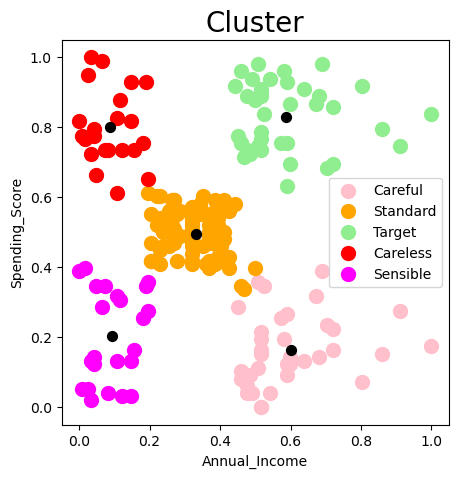

In [81]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(X)

plt.rcParams['figure.figsize'] = (5, 5)
plt.title('Cluster', fontsize = 20)

plt.scatter(X[ymeans == 0, 0], X[ymeans == 0, 1], s = 100, c = 'pink', label = 'Careful' )
plt.scatter(X[ymeans == 1, 0], X[ymeans == 1, 1], s = 100, c = 'orange', label = 'Standard')
plt.scatter(X[ymeans == 2, 0], X[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target')
plt.scatter(X[ymeans == 3, 0], X[ymeans == 3, 1], s = 100, c = 'red', label = 'Careless')
plt.scatter(X[ymeans == 4, 0], X[ymeans == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.legend()
plt.show()

The interpretation of the K-means clustering results showed that the five identified segments could be described as follows:

High income, high spending: This segment includes customers with high annual income and high spending score. These customers can be targeted with high-end products and services.

High income, low spending: This segment includes customers with high annual income but low spending score

# Conclusion

Kmeans and Hierechracal Clustering shows the better cluster than DBSCAN so i would like to recomend Kmeans clustering algorithim for the better busness decision